In [ ]:
%load_ext autoreload
%autoreload 2

### Promblema 
El problema onsiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que aterrizó o despegó de SCL.

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

### acercamiento:
para resolver est punto iniciaremos leyendo los datos, viendo la calidad y el tipo de informacion dentro del dataset. haremos la limpieza necesaria y observaremos que mas podemos hacer con la informacion disponible

In [1]:
# importar librerias
##generacion de path
import latam_airlines.utils.paths as path
## funciones propias
from latam_airlines.utils.latam_utils import check_quality, categorized_days_periods
## manipulacion de datos
import pandas as pd
import numpy as np
## Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura y calidad de datos

In [34]:
# Lectura del archivo dataset_SCL.csv
dataset_SCL = pd.read_csv(path.data_raw_dir('dataset_SCL.csv'), low_memory=False)
dataset_SCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha-I    68206 non-null  object 
 1   Vlo-I      68167 non-null  object 
 2   Ori-I      68167 non-null  object 
 3   Des-I      68167 non-null  object 
 4   Emp-I      68167 non-null  object 
 5   Fecha-O    68167 non-null  object 
 6   Vlo-O      68166 non-null  object 
 7   Ori-O      68167 non-null  object 
 8   Des-O      68167 non-null  object 
 9   Emp-O      68167 non-null  object 
 10  DIA        68167 non-null  float64
 11  MES        68167 non-null  float64
 12  AÑO        68167 non-null  float64
 13  DIANOM     68167 non-null  object 
 14  TIPOVUELO  68167 non-null  object 
 15  OPERA      68167 non-null  object 
 16  SIGLAORI   68167 non-null  object 
 17  SIGLADES   68167 non-null  object 
dtypes: float64(3), object(15)
memory usage: 9.4+ MB


observamos que:
- En total hay 68206 datos(ojo la fila 0 cuenta como dato)
- Hay columnas que no tiene todas las filas, indicando la existencia de valores faltantes
- Es necesario transformar las columnas de fecha a formato fecha
- Vemos que no consume mucha uso de memoria, por esta razon crearemos una copia para prevenir futuros problemas al cometer algun error.
- No existe nuestr variable target u objetivo, lo que se traduce en featuring data para crear el target

In [35]:
dataset_SCL_copy = dataset_SCL.copy()
dataset_SCL.sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
54254,2017-10-01 09:25:00,455,SCEL,SABE,LAN,2017-10-01 09:47:00,455,SCEL,SABE,LAN,1.0,10.0,2017.0,Domingo,I,Grupo LATAM,Santiago,Buenos Aires
26817,2017-05-28 21:45:00,638,SCEL,SPJC,LAN,2017-05-28 21:53:00,638,SCEL,SPJC,LAN,28.0,5.0,2017.0,Domingo,I,Grupo LATAM,Santiago,Lima
30454,2017-06-15 18:10:00,265,SCEL,SCTE,LAN,2017-06-15 18:44:00,265,SCEL,SCTE,LXP,15.0,6.0,2017.0,Jueves,N,Grupo LATAM,Santiago,Puerto Montt
54199,2017-10-07 14:45:00,445,SCEL,SAEZ,LAN,2017-10-07 14:59:00,445,SCEL,SAEZ,LAN,7.0,10.0,2017.0,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
63572,2017-12-24 11:05:00,112,SCEL,SCAT,SKU,2017-12-24 11:13:00,112,SCEL,SCAT,SKU,24.0,12.0,2017.0,Domingo,N,Sky Airline,Santiago,Copiapo
42712,2017-08-27 15:55:00,410,SCEL,SUMU,LAN,2017-08-27 16:06:00,410,SCEL,SUMU,LAN,27.0,8.0,2017.0,Domingo,I,Grupo LATAM,Santiago,Montevideo
32309,2017-06-21 11:00:00,200,SCEL,SPJC,LAW,2017-06-21 11:07:00,200,SCEL,SPJC,JMR,21.0,6.0,2017.0,Miercoles,I,Latin American Wings,Santiago,Lima
1772,2017-01-20 06:30:00,120,SCEL,SCCF,SKU,2017-01-20 06:31:00,120,SCEL,SCCF,SKU,20.0,1.0,2017.0,Viernes,N,Sky Airline,Santiago,Calama
13860,2017-03-23 15:10:00,800,SCEL,SPJC,SKU,2017-03-23 15:17:00,800,SCEL,SPJC,SKU,23.0,3.0,2017.0,Jueves,I,Sky Airline,Santiago,Lima
12290,2017-03-17 07:10:00,7661,SCEL,SBGR,GLO,2017-03-17 07:07:00,7661,SCEL,SBGR,GLO,17.0,3.0,2017.0,Viernes,I,Gol Trans,Santiago,Sao Paulo


### Verificacion de calidad de datos

In [36]:
check_quality(dataset_SCL)

Valores NA por columna:
Fecha-I       0
Vlo-I        39
Ori-I        39
Des-I        39
Emp-I        39
Fecha-O      39
Vlo-O        40
Ori-O        39
Des-O        39
Emp-O        39
DIA          39
MES          39
AÑO          39
DIANOM       39
TIPOVUELO    39
OPERA        39
SIGLAORI     39
SIGLADES     39
dtype: int64

Cantidad de datos duplicados:
0

Valores únicos por columna:
Fecha-I      53271
Vlo-I          581
Ori-I            1
Des-I           61
Emp-I           30
Fecha-O      62742
Vlo-O          857
Ori-O            1
Des-O           60
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        59
dtype: int64


Verificando la calidad de los datos podemos observar:
- Existen 39 filas con dainformacion NAN que se pueden iliminar.
- las columnas Ori-I,Ori-O,SIGLAORI solo tienen un valor unico asique no aportan informacion, las eliminaremos.
- No hay datos duplicados.
- Exiten un valor unico mas en Des-I que en Des-O, y un valor unico menos en SIGLADES puede ser un error de escritura
- Debemos corregir los errores de escritura para futuras comparaciones
- Es necesario hacer el cambio de variables string a catgoricas aun.
- Cambiar la columnas fecha a objeto fecha.

In [37]:
# Eliminamos valores NA
dataset_SCL.dropna(inplace=True)
# Eliminamos columnas que no aportan informacion
dataset_SCL.drop(columns=['Ori-I','Ori-O','SIGLAORI'], inplace=True)

In [38]:
dict_DesO = set(dataset_SCL['Des-O'])
dict_DesI = set(dataset_SCL['Des-I'])

only_in_DesO = dict_DesO - dict_DesI
only_in_DesI = dict_DesI - dict_DesO
both = dict_DesO & dict_DesI

print(f"Elements only in DesO: {only_in_DesO}")
print(f"Elements only in DesI: {only_in_DesI}")
print(f"Len elements both: {len(both)}")

Elements only in DesO: {'KIAD'}
Elements only in DesI: {'SEQU', 'SARI'}
Len elements both: 59


In [51]:
dataset_SCL[dataset_SCL['Des-I']==list(only_in_DesI)[1]]


,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [52]:
dataset_SCL[dataset_SCL['SIGLADES']=='Cataratas Iguacu']

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
1219,2017-01-03 07:15:00,9782,SBFI,TAM,2017-01-03 07:20:00,9782,SBFI,TAM,3.0,1.0,2017.0,Martes,I,Grupo LATAM,Santiago,Cataratas Iguacu
67697,2017-12-16 02:45:00,1261,SBFI,LAN,2017-12-16 02:43:00,1261.0,SBFI,LAN,16.0,12.0,2017.0,Sabado,I,Grupo LATAM,Santiago,Cataratas Iguacu


In [50]:
dataset_SCL.loc[dataset_SCL['Des-I']==list(only_in_DesI)[1],'Des-I'] = 'SBFI'

In [53]:
dataset_SCL.to_csv(path.data_interim_dir('modify_data.csv'), index=False)

In [56]:
# Validación para ver si lo programado es igual a lo operado
dataset_SCL['Vlo_change'] = dataset_SCL.apply(lambda x: '0' if x['Vlo-I']==x['Vlo-O'] else '1', axis=1)
dataset_SCL['Des_change'] = dataset_SCL.apply(lambda x: '0' if x['Des-I']==x['Des-O'] else '1', axis=1)
dataset_SCL['Emp_change'] = dataset_SCL.apply(lambda x:'0' if x['Emp-I']==x['Emp-O'] else '1', axis=1)

In [58]:
cols = ['Vlo_change','Des_change','Emp_change']

for col in cols:
    print(col)
    print(dataset_SCL[col].value_counts())
    print('='*20)
    print(col+' Porcentaje')
    print(dataset_SCL[col].value_counts(normalize=True)*100)
    print('='*20)

Vlo_change
0    63660
1     4506
Name: Vlo_change, dtype: int64
Vlo_change Porcentaje
0    93.389666
1     6.610334
Name: Vlo_change, dtype: float64
Des_change
0    68141
1       25
Name: Des_change, dtype: int64
Des_change Porcentaje
0    99.963325
1     0.036675
Name: Des_change, dtype: float64
Emp_change
0    49533
1    18633
Name: Emp_change, dtype: int64
Emp_change Porcentaje
0    72.665258
1    27.334742
Name: Emp_change, dtype: float64


Observamso que:
- El numero de vuelo cambio en la operación en un 6.6% con respecto a todos los vuelos programados.
- La ciudad destino cambio en la operación en un 0.04% con respecto a todos los vuelos programados.
- El codigo de la aerolínea cambio en su ejecución en un 27.37% con respecto a todos los vuelos programados.
- Las nuevas variables Vlo_change y Emp_change tienen la posibilidad de ser empleadas en el proceso de entrenamiento.
- La variables Des_change no serán usadas debido a la baja varianza.

In [66]:
# Eliminamos columna con baja varianza
dataset_SCL.drop(columns= 'Des_change', inplace=True)


In [67]:
dataset_SCL.sample(10)

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,Vlo_change,Emp_change
34091,2017-07-23 10:30:00,104,SCSE,SKU,2017-07-23 10:30:00,104,SCSE,SKU,23.0,7.0,2017.0,Domingo,N,Sky Airline,La Serena,0,0
46799,2017-09-18 15:41:00,152,SCCF,LAN,2017-09-18 15:36:00,152,SCCF,LAN,18.0,9.0,2017.0,Lunes,N,Grupo LATAM,Calama,0,0
9707,2017-02-18 13:45:00,279,SCBA,LAN,2017-02-18 13:49:00,279,SCBA,LXP,18.0,2.0,2017.0,Sabado,N,Grupo LATAM,Balmaceda,0,1
22143,2017-04-30 01:15:00,700,SPJC,LAW,2017-04-30 02:02:00,700,SPJC,JMR,30.0,4.0,2017.0,Domingo,I,Latin American Wings,Lima,0,1
37245,2017-07-21 16:15:00,486,SACO,LAN,2017-07-21 16:35:00,486,SACO,LAN,21.0,7.0,2017.0,Viernes,I,Grupo LATAM,Cordoba,0,0
195,2017-01-27 22:35:00,11,MMMX,AMX,2017-01-27 22:30:00,11,MMMX,AMX,27.0,1.0,2017.0,Viernes,I,Aeromexico,Ciudad de Mexico,0,0
66699,2017-12-17 23:20:00,500,KMIA,LAN,2017-12-17 23:41:00,500.0,KMIA,LAN,17.0,12.0,2017.0,Domingo,I,Grupo LATAM,Miami,1,0
65501,2017-12-11 10:32:00,261,SCTE,LAN,2017-12-11 11:13:00,261.0,SCTE,LXP,11.0,12.0,2017.0,Lunes,N,Grupo LATAM,Puerto Montt,1,1
39683,2017-08-10 11:00:00,11,SCTE,SKU,2017-08-10 11:03:00,11,SCTE,SKU,10.0,8.0,2017.0,Jueves,N,Sky Airline,Puerto Montt,0,0
25808,2017-05-22 11:10:00,332,SCFA,LAN,2017-05-22 11:12:00,332,SCFA,LXP,22.0,5.0,2017.0,Lunes,N,Grupo LATAM,Antofagasta,0,1


In [68]:
#Cambiamos el formato a fecha
cols_date = ['Fecha-I','Fecha-O']
for col in cols_date:
    dataset_SCL[col] = pd.to_datetime(dataset_SCL[col], format='%Y-%m-%d %H:%M:%S')

In [69]:
dataset_SCL.describe(datetime_is_numeric=True)

,Fecha-I,Fecha-O,DIA,MES,AÑO
count,68166,68166,68166.000000,68166.000000,68166.000000
mean,2017-07-05 10:37:37.216794368,2017-07-05 10:46:43.755831296,15.714858,6.620441,2017.000029
min,2017-01-01 00:15:00,2017-01-01 00:04:00,1.000000,1.000000,2017.000000
25%,2017-03-31 12:05:00,2017-03-31 12:16:00,8.000000,3.000000,2017.000000
50%,2017-07-10 01:55:00,2017-07-10 01:48:00,16.000000,7.000000,2017.000000
75%,2017-10-08 08:26:00,2017-10-08 08:23:00,23.000000,10.000000,2017.000000
max,2017-12-31 23:55:00,2018-01-01 00:12:00,31.000000,12.000000,2018.000000
std,NaN,NaN,8.782890,3.522743,0.005417


observamos que:
- La resolucion temporal es de un anio de datos, puntualmente el anio 2017.
- No podemos obtener conclusiones o analizar datos con los dias, meses o anios en formato numero, por que son variables categoricas ordinales,esto al poseer un orden natural.
- Debemos crear o reemplazar las columnas de dia, mes y anio(no tan relevante) con sus respectivo datos categoricos.
- Vemos que las demas variables son string y veremos si es necesario cambiarlas a categorias.

In [71]:
dataset_SCL.columns

Index(['Fecha-I', 'Vlo-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Des-O',
       'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'Vlo_change', 'Emp_change'],
      dtype='object')

In [72]:
# creamos variables para ayudarnos a hacer el analisis
days = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
months = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
d = dict(zip(np.arange(1, 13),months))
dataset_SCL['MESNOM'] = dataset_SCL['MES'].astype(int).replace(d, regex=True)

#cambiamos las demas variables a formato
cols = ['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O','Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA','SIGLADES', 'Vlo_change','Emp_change']
for col in cols:
    if col == 'DIANOM':
        dataset_SCL[col] = pd.Categorical(dataset_SCL[col],ordered=True, categories=days)
    else:
        dataset_SCL[col] = dataset_SCL[col].astype('category')

dataset_SCL.sort_values('Fecha-I', inplace=True)

In [73]:
dataset_SCL.sample(5)

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,Vlo_change,Emp_change,MESNOM
12927,2017-03-19 08:10:00,51,SCQP,SKU,2017-03-19 08:07:00,51,SCQP,SKU,19.0,3.0,2017.0,Domingo,N,Sky Airline,Temuco,0,0,Mar
38671,2017-08-27 19:25:00,1287,SAEZ,ARG,2017-08-27 19:26:00,1287,SAEZ,ARG,27.0,8.0,2017.0,Domingo,I,Aerolineas Argentinas,Buenos Aires,0,0,Ago
67710,2017-12-07 05:00:00,50,SCFA,LAW,2017-12-07 04:55:00,50.0,SCFA,JMR,7.0,12.0,2017.0,Jueves,N,Latin American Wings,Antofagasta,1,1,Dic
4892,2017-01-15 17:15:00,461,SABE,LAN,2017-01-15 17:31:00,461,SABE,LAN,15.0,1.0,2017.0,Domingo,I,Grupo LATAM,Buenos Aires,0,0,Ene
3668,2017-01-24 14:00:00,241,SCVD,LAN,2017-01-24 14:01:00,241,SCVD,LXP,24.0,1.0,2017.0,Martes,N,Grupo LATAM,Valdivia,0,1,Ene


Con la transformacion de las variables al formato correspondiente iniciamos el analisis de la informacion. Sin embargo, como el objetivo principal es predecir el retraso en los vuelos del aeropuerto es fundamenta crear nuestra variable objetivo o target y otras variables auxiliares, esto nos ayuda a no divagar en los datos u obtener metricas que no estan alineadas a responder nuestro objetivo principal(probabilidad de retraso). Aqui abordaremos el segundo punto del desafio.

### Problema:
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I.
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

### Acercamiento:
- Usaremos diversas funciones de pandas y numpy para crear estas nuevas columnas
- En términos de velocidad, "np.where" suele ser más rápido que "map" y "apply". Esto se debe a que "np.where" es una función vectorizada que procesa los datos directamente en una matriz numpy, mientras que "map" y "apply" son funciones de pandas que procesan los datos uno por uno. para efecto practicos intentaremos usar cada una.
- Como no hemos hecho un EDA, aprovecharemos la creacion de la variable objetivo para hacer analisis univariados, bivariados y multivariados
- 


### Creacion de la varaible objetivo 'atraso_15'.

En la creacion de la varaible objetivo 'atraso_15'.
- usamos una resta de fechas entre Fecha-O y Fecha-I.
- obtenemos el total en segundos.
- dividir entre 60 seg para obtener los minutos.
- usamos map para obtener 1 si es mayor a 15 min y si no, 0

Validacion y analisis de datos
- cual es la distribucion del atraso? que nos indica?
- Que porcentaje de vuelos tienen un atraso mayor a 15 min?
- Cuales aerolineas presentan mayor atraso?
- que dia y mes de la semana tiene mayor atraso?

In [74]:
# Crear la columna 'dif_min'
dataset_SCL['dif_min'] = (dataset_SCL['Fecha-O'] - dataset_SCL['Fecha-I']).dt.total_seconds() / 60# numero de segundos en un minuto

# Crear la columna 'atraso_15'
dataset_SCL['atraso_15'] =dataset_SCL['dif_min'].map(lambda x: '1' if x>15 else '0')

In [75]:
# verificamos la existencia de diferencias negativas en los minutos
print(dataset_SCL[dataset_SCL['dif_min']<0].shape)
(dataset_SCL[dataset_SCL['dif_min']<0].shape[0] / dataset_SCL.shape[0])*100


(17904, 20)


26.26529354810316

- Verificamos la existencia de diferencias negativas en los minutos, indicando el adelanto del los vuelos.
- En el anio 2017, 17904 vuelos fueron adelantados representando un 26.3% de los vuelos anuales.
- Nuestro principal objetivo es predecir el atraso, entonces podriamos eliminar estos vuelos, pero la decision la tomaremos ams adelante.


In [76]:
# vuelos atrasados
print(dataset_SCL['atraso_15'].value_counts())
dataset_SCL['atraso_15'].value_counts(normalize = True)*100

0    55560
1    12606
Name: atraso_15, dtype: int64


0    81.50691
1    18.49309
Name: atraso_15, dtype: float64

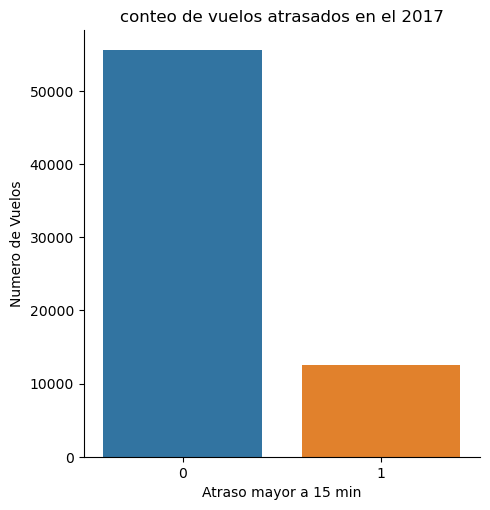

In [77]:
sns.catplot(
    data= dataset_SCL,
    x='atraso_15',
    kind='count',
)
plt.xlabel('Atraso mayor a 15 min')
plt.ylabel('Numero de Vuelos')
plt.title('conteo de vuelos atrasados en el 2017')
plt.show()

- Podemos observar que 12606 vuelos correspondiendo al 18.5% del 2017 presentaron retraso un retraso de minimo 15 minutos.

In [78]:
# porcentaje de dias con retraso
dataset_SCL.loc[dataset_SCL['atraso_15']=='1','Fecha-I'].dt.date.nunique()/dataset_SCL['Fecha-I'].dt.date.nunique()*100

100.0

Vemos que todos los dias se presento al menos un atraso de 15 minutos

In [79]:
top_opera_atraso = dataset_SCL.groupby(['OPERA','atraso_15']).size().reset_index(name='num_vuelos')
top_opera_atraso[top_opera_atraso['atraso_15']=='1'].sort_values('num_vuelos', ascending=False).head(10)

,OPERA,atraso_15,num_vuelos
25,Grupo LATAM,1,7298
43,Sky Airline,1,2540
35,Latin American Wings,1,681
1,Aerolineas Argentinas,1,468
15,Avianca,1,306
23,Gol Trans,1,287
5,Air Canada,1,258
29,JetSmart SPA,1,196
19,Copa Air,1,116
41,Qantas Airways,1,113


- Obtenemos el top 10 de los operdores que presentan atrasos superiores a 15 minutos, sin embargo esta medida debe ser contrastada con la cantidad de vuelos anuales y tambien por operador

In [80]:
# Calcular el porcentaje anual de nuemor de vuelos
top_opera_atraso['Porcentaje_anual'] = top_opera_atraso['num_vuelos']/len(dataset_SCL)*100

# Calcular el número total de vuelos para cada valor de atraso_15
total_vuelos = dataset_SCL.groupby('OPERA').size().reset_index(name='Total_vuelos')

# Unir los resultados para calcular el porcentaje de vuelos por operador para cada valor de atraso_15
result = pd.merge(top_opera_atraso, total_vuelos, on='OPERA')
result['Porcentaje_opera'] = result['num_vuelos'] / result['Total_vuelos'] * 100
result = result[['OPERA', 'atraso_15', 'num_vuelos', 'Total_vuelos','Porcentaje_opera', 'Porcentaje_anual']]
result[result['atraso_15']=='1'].sort_values(['Porcentaje_anual','Porcentaje_opera'],ascending=False).head(10)

,OPERA,atraso_15,num_vuelos,Total_vuelos,Porcentaje_opera,Porcentaje_anual
25,Grupo LATAM,1,7298,40854,17.863612,10.706217
43,Sky Airline,1,2540,14298,17.764722,3.726198
35,Latin American Wings,1,681,1673,40.705320,0.999032
1,Aerolineas Argentinas,1,468,1949,24.012314,0.686559
15,Avianca,1,306,1152,26.562500,0.448904
23,Gol Trans,1,287,806,35.607940,0.421031
5,Air Canada,1,258,565,45.663717,0.378488
29,JetSmart SPA,1,196,1095,17.899543,0.287533
19,Copa Air,1,116,1850,6.270270,0.170173
41,Qantas Airways,1,113,195,57.948718,0.165772


In [81]:
result[result['atraso_15']=='1'].sort_values(['Porcentaje_opera','Porcentaje_anual'],ascending=False).head(10)

,OPERA,atraso_15,num_vuelos,Total_vuelos,Porcentaje_opera,Porcentaje_anual
39,Plus Ultra Lineas Aereas,1,30,49,61.224490,0.044010
41,Qantas Airways,1,113,195,57.948718,0.165772
5,Air Canada,1,258,565,45.663717,0.378488
35,Latin American Wings,1,681,1673,40.705320,0.999032
23,Gol Trans,1,287,806,35.607940,0.421031
15,Avianca,1,306,1152,26.562500,0.448904
1,Aerolineas Argentinas,1,468,1949,24.012314,0.686559
13,Austral,1,15,74,20.270270,0.022005
29,JetSmart SPA,1,196,1095,17.899543,0.287533
25,Grupo LATAM,1,7298,40854,17.863612,10.706217


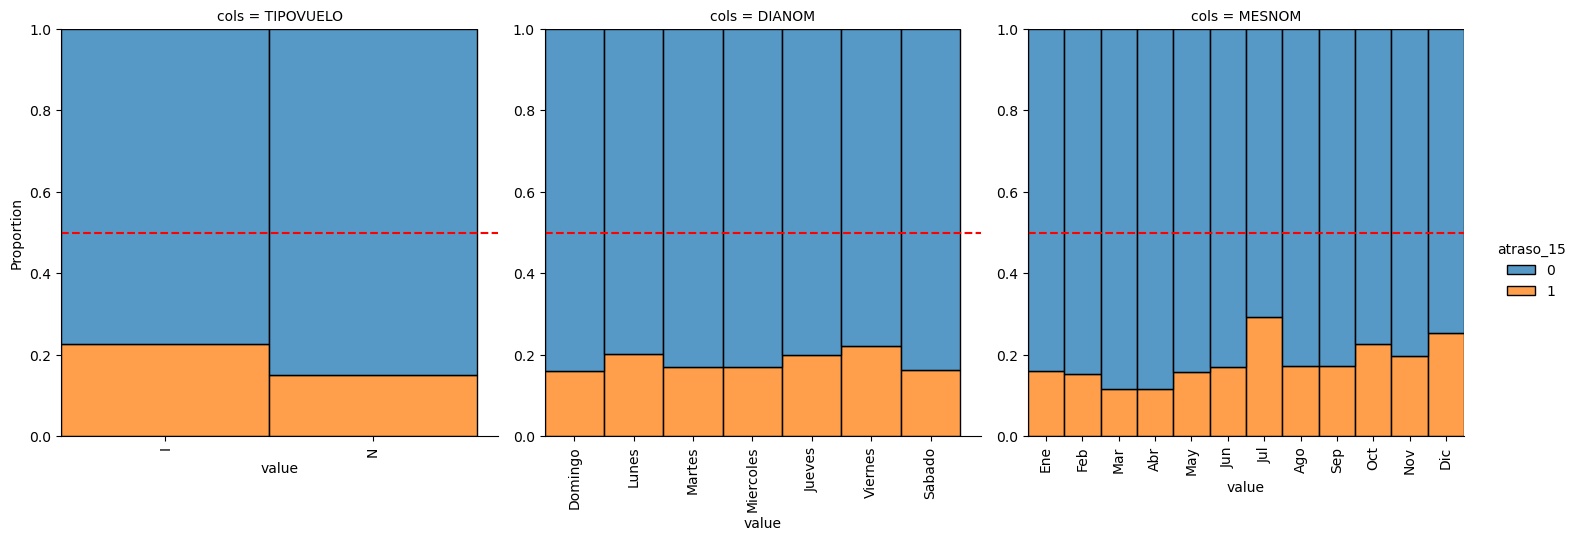

In [84]:
cols = ['TIPOVUELO','DIANOM','MESNOM','atraso_15']

dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')
g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=3,
    facet_kws={'sharey': False, 'sharex': False}
)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

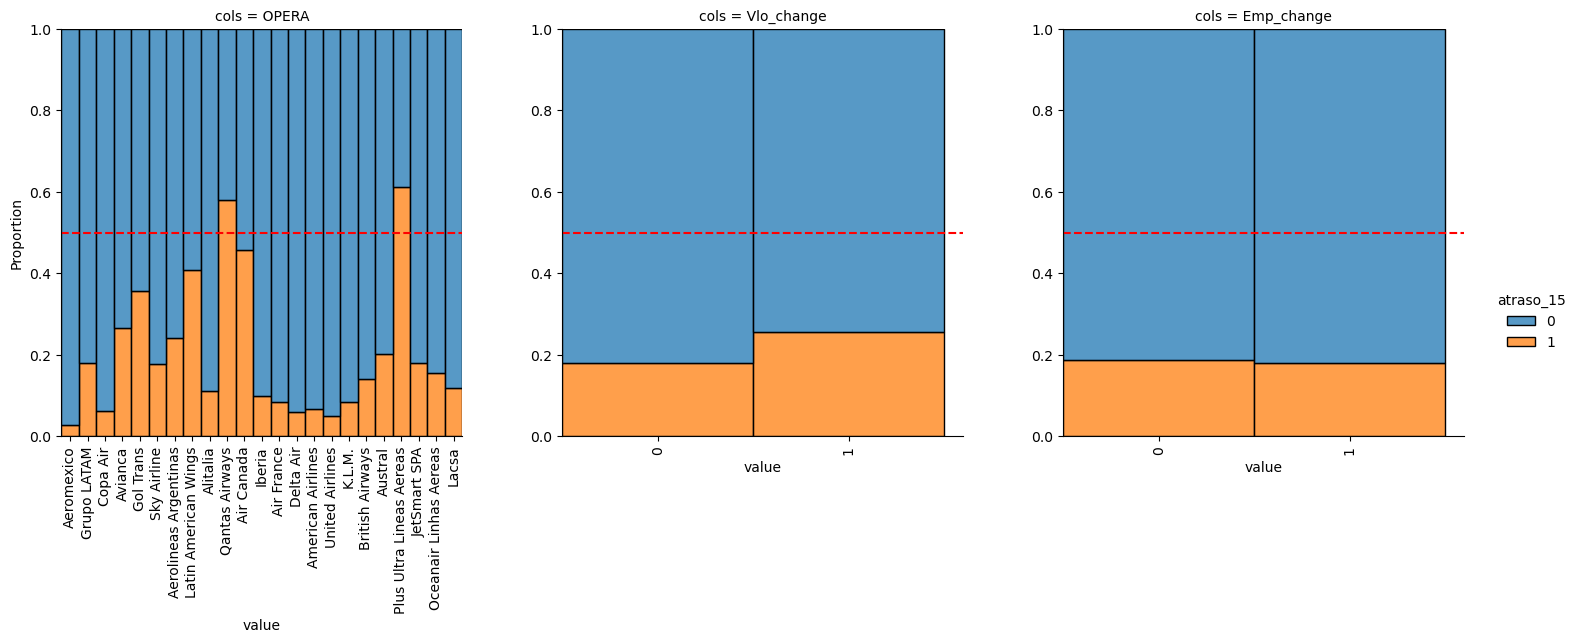

In [85]:
cols = ['OPERA', 'Vlo_change', 'Emp_change', 'atraso_15']

dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')
g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=3,
    facet_kws={'sharey': False, 'sharex': False}
)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

Con esta tabla observamos:
- El Grupo Latam tiene una tasa del 10.7% en vuelos con atraso mayores a 15 min en el 2017, seguido por Sky Airlines con un 3.7% y Latin American Wings con 1%
- El Grupo Latam se encuentra en el decimo puesto con una tasa de retraso del 18% en el 2017, el primero en el ranking es Plus Ultra Lineas Aereas con 61% seguido por Qantas Airways con 58%
- Los vuelos internacionales son los que mayor tasa de atraso presentan
- Los Lunes, Jueves y Viernes son los dias con mayor tasa de atraso
- Los meses de Julio, Octubre y Diciembre son los meses con mayor tasa de atraso
- Se observa que los vuelo que presentan cambio en su numero de vuelo tiene mas vuelos atrasados
- No hay una diferencia clara entre los vuelos que cambia de Código aerolínea y el atraso

### Creacion de nueva columna Temporada alta
En general, "loc" es más adecuado para seleccionar y manipular filas y columnas específicas en un DataFrame, mientras que "np.where" es más adecuado para aplicar operaciones matemáticas y lógicas complejas a los datos.

En la creacion de la nueva feature 'temporada_alta' usamos una mascara con las condicionales necesarias y nos aprovechamos del conocimiento previo de solo tener un anio(2017).
- Como solo tenemos un anio no es necesario hacer una automatizacion de selecion de fechas o algo por el estilo.
- Como nuestra fecha tiene el formato fechas y hora debemos ser precavidos, porque al momento de elegir una fecha menor o igual(<=) el escogera hata las 00 horas de la fecha indicada, asi que debemos agregar un dia mas para seleccione todos los registro de mi fecha limite que va hasta las 23:59 horas, ejemplo: la fecha 3-Mar, debemos colocar en la condicion la fecha 4-Mar, para seleccionar todo el dia 3-mar.
- En la condicion de 1 si Fecha-I está entre 15-Dic y 3-Mar y cambiamos un poco la condicion de 15-Dic o 3-Mar, para que pueda seleccionar el rango de fechas solicitado, esto no afecta el resultado para este caso particular

Validacion y analisis de datos
- cual es la distribucion de la temporada? que nos indica?
- Que porcentaje de vuelos estan en temporada alta?

In [86]:
# creacion de mascara
temporada_alta = ((dataset_SCL['Fecha-I']>='2017-12-15') | (dataset_SCL['Fecha-I']<='2017-03-04')) | \
    ((dataset_SCL['Fecha-I']>='2017-07-15') & (dataset_SCL['Fecha-I']<='2017-08-01')) | \
        ((dataset_SCL['Fecha-I']>='2017-09-11') & (dataset_SCL['Fecha-I']<='2017-10-01'))

# podemos hacerlo con .loc tambien 
dataset_SCL['temporada_alta'] = np.where(temporada_alta, '1', '0')

# Validación en porcentaje
dataset_SCL['temporada_alta'].value_counts(normalize = True)*100

0    66.618255
1    33.381745
Name: temporada_alta, dtype: float64

In [87]:
# porcentaje de dias en temporada alta
dataset_SCL.loc[dataset_SCL['temporada_alta']=='1','Fecha-I'].dt.date.nunique()/dataset_SCL['Fecha-I'].dt.date.nunique()*100

31.780821917808222

### Crear la columna 'periodo_dia'

In [88]:
# Crear la columna 'periodo_dia'
dataset_SCL['periodo_dia'] = dataset_SCL.apply(categorized_days_periods, axis=1)
dataset_SCL['periodo_dia'].value_counts(normalize = True)*100

tarde     37.414547
mañana    37.137283
noche     25.448171
Name: periodo_dia, dtype: float64

In [89]:
# Validación la correcta creacion de periodo
dataset_SCL['hora']=dataset_SCL['Fecha-I'].dt.hour
dataset_SCL.groupby(by=['periodo_dia','hora']).size()

periodo_dia  hora
mañana       5       2514
             6       4198
             7       4881
             8       4330
             9       3264
             10      2462
             11      3666
noche        0       1082
             1       1573
             2        641
             3        505
             4       1092
             19      3591
             20      2934
             21      2312
             22      2320
             23      1297
tarde        12      3412
             13      3675
             14      3835
             15      3883
             16      3072
             17      3465
             18      4162
dtype: int64

In [90]:
# Eliminar la variable hora
dataset_SCL.drop(columns='hora', inplace=True)

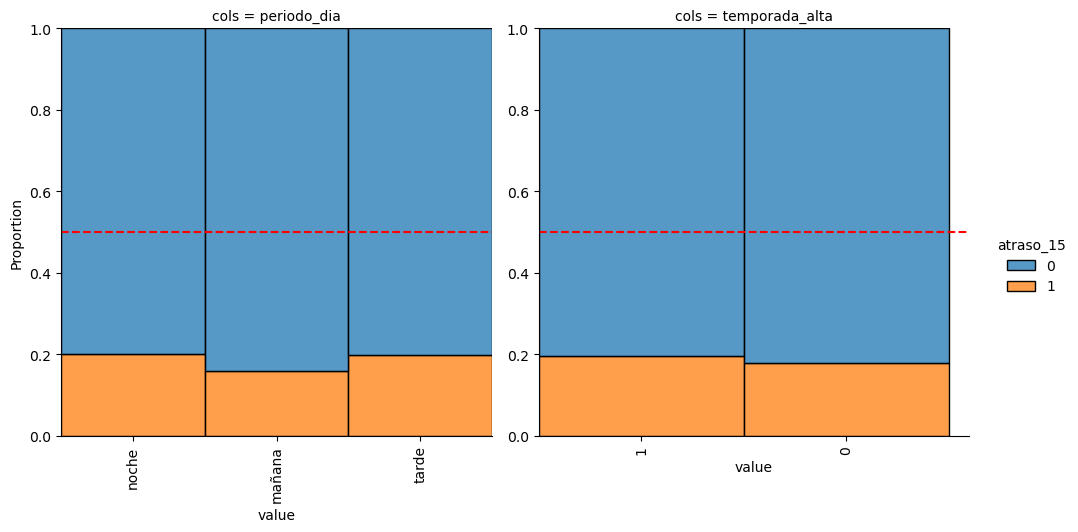

In [91]:
cols = ['periodo_dia','temporada_alta', 'atraso_15']

dataset_SCL_melt= dataset_SCL[cols].melt(id_vars='atraso_15', var_name='cols')
g = sns.displot(
    data=dataset_SCL_melt,
    x='value',
    col='cols',
    hue='atraso_15',
    multiple='fill',
    stat='proportion',
    col_wrap=2,
    facet_kws={'sharey': False, 'sharex': False}
)

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.axhline(y=0.5, color='red', linestyle='--')

Observamos que: 
- Un 33% de los vuelos del anio 2017 fueron hechos en temporada alta
- El 31% o 116 dias del anio estan en temporada alta
- Hay poca diferencia entre el atraso y la temporada alta
- La noche presenta la menor tasa de vuelos del dia con 25.5%
- La mañana y tarde tiene tasas simimilares 37%
- La noche y la tarde tienen tasas similares respecto al atraso de vuelos
- La manana presenta una tasa menor que el resto del dia

In [ ]:
dataset_SCL.sample(5)

In [95]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(dataset_SCL['Des-I'], dataset_SCL['atraso_15']).reset_index()
tabla_contingencia

atraso_15,Des-I,0,1
0,CYYZ,194,89
1,EGLL,176,29
2,EGYP,0,1
3,KATL,337,21
4,KDFW,332,25
5,KIAH,318,17
6,KJFK,300,83
7,KLAX,116,39
8,KMCO,25,9
9,KMIA,822,193


In [ ]:
dataset_SCL.info()

In [ ]:
# Exportar las columnas adicionales a un archivo .csv
dataset_SCL.to_csv('synthetic_features.csv', index=False)